# Business Intelligence Project: Store-SKU Analysis 

## Importing Libraries

In [1]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('store_sku_ba_dataset.csv')
df.shape

(1000, 5)

## Exploratory Data Analysis

In [5]:
df.head()

,Store ID,SKU ID,Total Visits,Transactions,Revenue
0,Store_1,SKU_1,606,573,74688.67
1,Store_1,SKU_2,695,27,1390.60
2,Store_1,SKU_3,389,285,50679.63
3,Store_1,SKU_4,689,505,16764.34
4,Store_1,SKU_5,522,230,41928.40


In [6]:
df.tail()

,Store ID,SKU ID,Total Visits,Transactions,Revenue
995,Store_50,SKU_16,704,40,7557.12
996,Store_50,SKU_17,846,104,13813.85
997,Store_50,SKU_18,868,842,104198.81
998,Store_50,SKU_19,959,209,7604.58
999,Store_50,SKU_20,762,376,14784.73


In [7]:
df.shape

(1000, 5)

In [8]:
df.size

5000

In [9]:
df.dtypes

Store ID         object
SKU ID           object
Total Visits      int64
Transactions      int64
Revenue         float64
dtype: object

In [10]:
df.columns

Index(['Store ID', 'SKU ID', 'Total Visits', 'Transactions', 'Revenue'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store ID      1000 non-null   object 
 1   SKU ID        1000 non-null   object 
 2   Total Visits  1000 non-null   int64  
 3   Transactions  1000 non-null   int64  
 4   Revenue       1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [12]:
df.isnull().sum()

Store ID        0
SKU ID          0
Total Visits    0
Transactions    0
Revenue         0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [58]:
df['Conversion Rate'] = df['Transactions'] / df['Total Visits']

# Store-level aggregation
store_df = df.groupby('Store ID').agg({
    'Total Visits': 'sum',
    'Transactions': 'sum',
    'Revenue': 'sum'
}).reset_index()
store_df['Conversion Rate'] = (store_df['Transactions'] / store_df['Total Visits'])*100
store_df = store_df.sort_values(by='Conversion Rate', ascending=False)

# SKU-level aggregation
sku_df = df.groupby('SKU ID').agg({
    'Total Visits': 'sum',
    'Transactions': 'sum',
    'Revenue': 'sum'
}).reset_index()
sku_df['Conversion Rate'] = (sku_df['Transactions'] / sku_df['Total Visits'])*100
sku_df = sku_df.sort_values(by='Conversion Rate', ascending=False)

In [61]:
print("Top 20 Stores by Conversion Rate (%):")
display(store_df[['Store ID', 'Total Visits', 'Transactions', 'Revenue', 'Conversion Rate']].head(20))

Top 20 Stores by Conversion Rate (%):


,Store ID,Total Visits,Transactions,Revenue,Conversion Rate
32,Store_39,9213,6124,667804.09,66.471291
43,Store_49,11032,7129,793523.76,64.621102
38,Store_44,8482,5356,467371.06,63.145485
30,Store_37,9458,5937,404139.26,62.772256
41,Store_47,9753,6081,521435.76,62.350046
48,Store_8,8794,5443,547882.53,61.894474
31,Store_38,8975,5518,509927.46,61.481894
44,Store_5,11997,7275,713837.60,60.640160
37,Store_43,12664,7616,786369.76,60.138977
20,Store_28,12186,7238,1057732.38,59.396028


In [62]:
print("Bottom 20 Stores by Conversion Rate (%):")
display(store_df[['Store ID', 'Total Visits', 'Transactions', 'Revenue', 'Conversion Rate']].tail(20))

Bottom 20 Stores by Conversion Rate (%):


,Store ID,Total Visits,Transactions,Revenue,Conversion Rate
2,Store_11,9362,4526,428488.02,48.344371
33,Store_4,11112,5296,627270.33,47.660187
34,Store_40,10295,4891,573784.33,47.508499
45,Store_50,11172,5203,491489.52,46.571787
36,Store_42,11239,5196,544943.93,46.231871
25,Store_32,9157,4085,438905.49,44.610680
19,Store_27,8856,3943,501106.44,44.523487
47,Store_7,9822,4305,477403.31,43.830177
4,Store_13,11846,5155,564842.31,43.516799
10,Store_19,10678,4627,499675.35,43.332085


In [63]:
print("Top 20 SKUs by Conversion Rate (%):")
display(sku_df[['SKU ID', 'Total Visits', 'Transactions', 'Revenue', 'Conversion Rate']].head(20))

Top 20 SKUs by Conversion Rate (%):


,SKU ID,Total Visits,Transactions,Revenue,Conversion Rate
2,SKU_11,27856,16323,1665863.73,58.597789
17,SKU_7,26103,14654,1674024.12,56.139141
7,SKU_16,23574,12906,1234789.51,54.746755
14,SKU_4,24782,13505,1370489.58,54.495198
19,SKU_9,26715,14324,1284551.61,53.617818
0,SKU_1,25111,13306,1460745.93,52.988730
5,SKU_14,24225,12660,1453326.17,52.260062
1,SKU_10,27641,14333,1436928.71,51.854130
13,SKU_3,27772,14055,1606430.55,50.608527
6,SKU_15,29758,15045,1505667.46,50.557833


In [64]:
print("Bottom 20 SKUs by Conversion Rate (%):")
display(sku_df[['SKU ID', 'Total Visits', 'Transactions', 'Revenue', 'Conversion Rate']].tail(20))

Bottom 20 SKUs by Conversion Rate (%):


,SKU ID,Total Visits,Transactions,Revenue,Conversion Rate
2,SKU_11,27856,16323,1665863.73,58.597789
17,SKU_7,26103,14654,1674024.12,56.139141
7,SKU_16,23574,12906,1234789.51,54.746755
14,SKU_4,24782,13505,1370489.58,54.495198
19,SKU_9,26715,14324,1284551.61,53.617818
0,SKU_1,25111,13306,1460745.93,52.988730
5,SKU_14,24225,12660,1453326.17,52.260062
1,SKU_10,27641,14333,1436928.71,51.854130
13,SKU_3,27772,14055,1606430.55,50.608527
6,SKU_15,29758,15045,1505667.46,50.557833


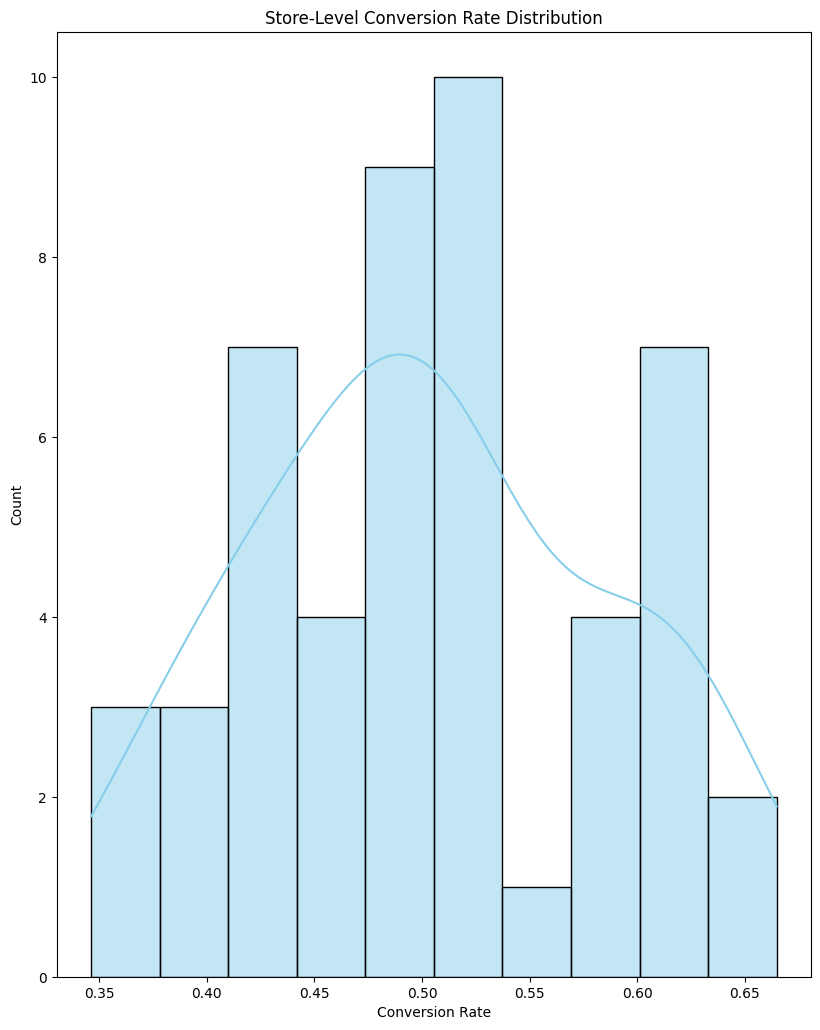

In [21]:
plt.figure(figsize=(16, 20))
plt.subplot(2, 2, 1)
sns.histplot(store_df['Conversion Rate'], bins=10, kde=True, color='skyblue')
plt.title("Store-Level Conversion Rate Distribution")
plt.tight_layout()
plt.show()

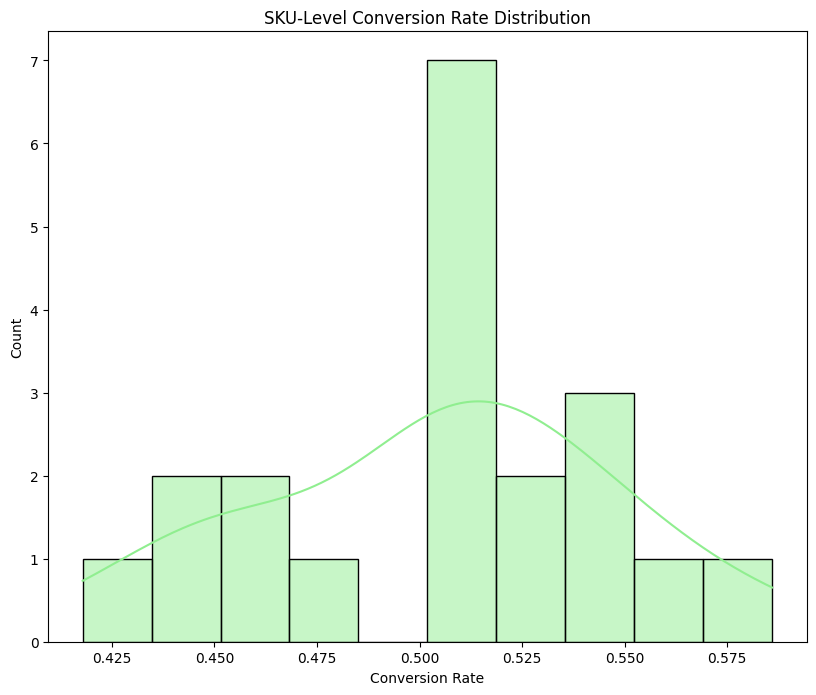

In [22]:
plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 2)
sns.histplot(sku_df['Conversion Rate'], bins=10, kde=True, color='lightgreen')
plt.title("SKU-Level Conversion Rate Distribution")
plt.tight_layout()
plt.show()

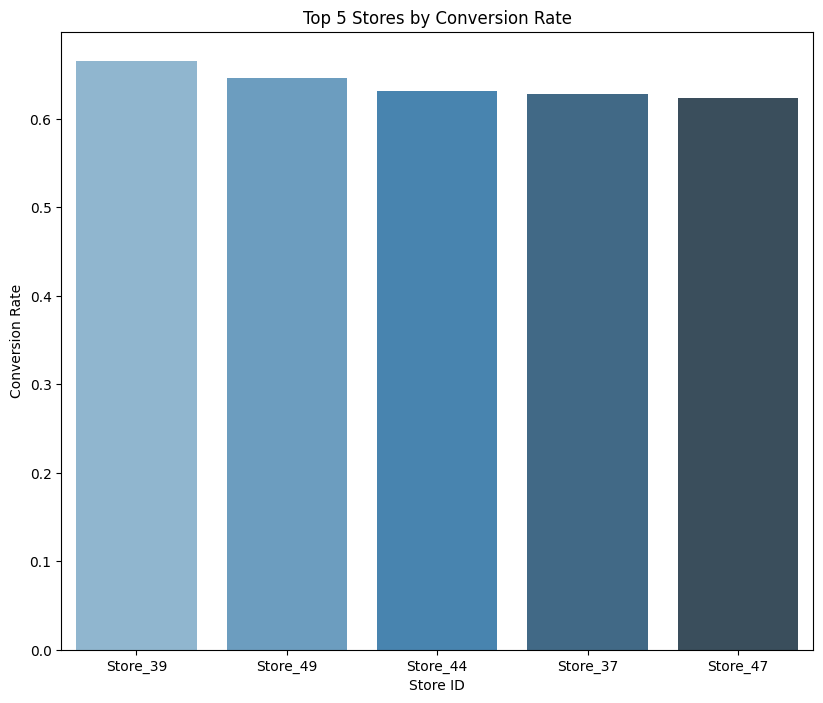

In [23]:
plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 3)
sns.barplot(x='Store ID', y='Conversion Rate', data=store_df.head(5), palette='Blues_d')
plt.title("Top 5 Stores by Conversion Rate")
plt.tight_layout()
plt.show()

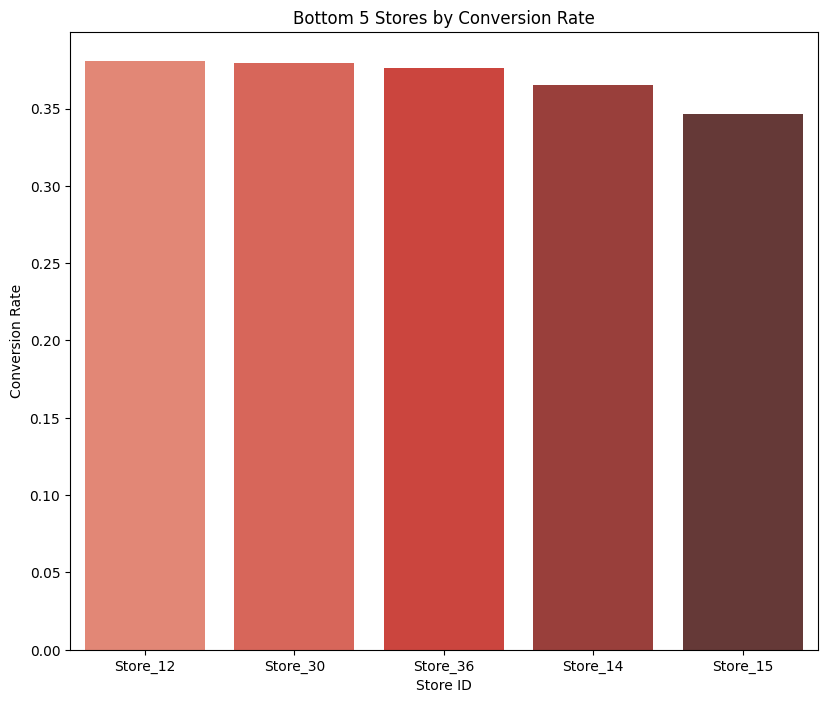

In [24]:
plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 4)
sns.barplot(x='Store ID', y='Conversion Rate', data=store_df.tail(5), palette='Reds_d')
plt.title("Bottom 5 Stores by Conversion Rate")
plt.tight_layout()
plt.show()

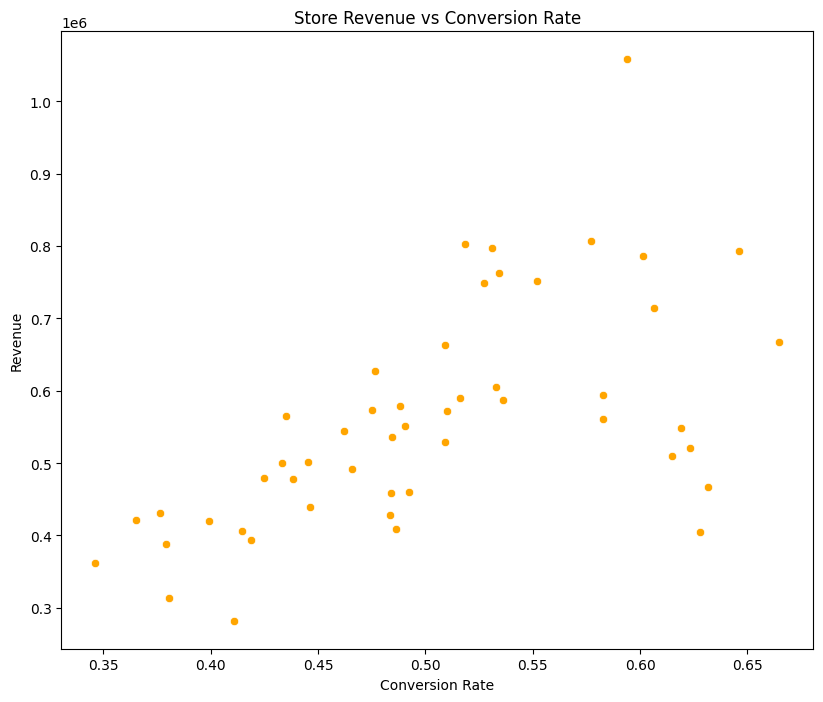

In [25]:
plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 5)
sns.scatterplot(data=store_df, x='Conversion Rate', y='Revenue', color='orange')
plt.title("Store Revenue vs Conversion Rate")
plt.tight_layout()
plt.show()

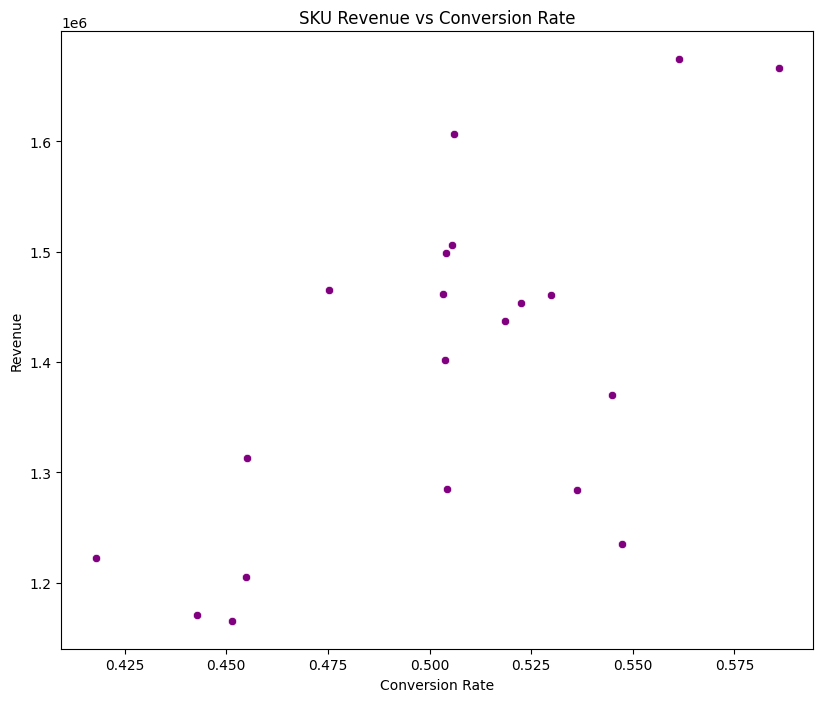

In [26]:
plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 6)
sns.scatterplot(data=sku_df, x='Conversion Rate', y='Revenue', color='purple')
plt.title("SKU Revenue vs Conversion Rate")
plt.tight_layout()
plt.show()

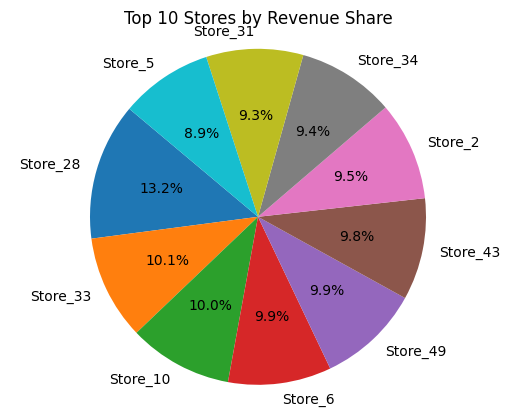

In [27]:
top10_store_revenue = store_df.sort_values(by='Revenue', ascending=False).head(10)
plt.figure()
plt.pie(top10_store_revenue['Revenue'], labels=top10_store_revenue['Store ID'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Stores by Revenue Share')
plt.axis('equal')
plt.show()

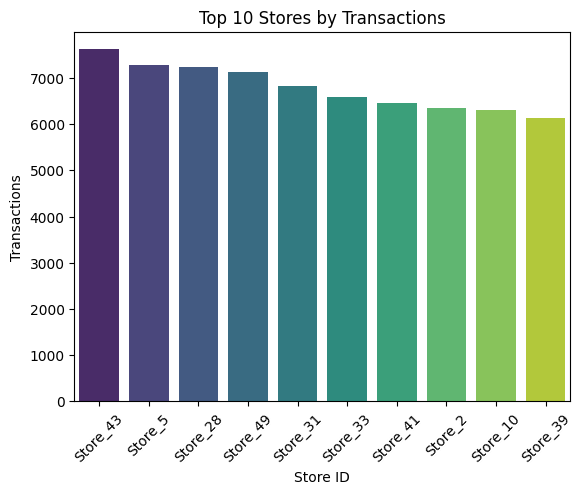

In [32]:
top10_store_transactions = store_df.sort_values(by='Transactions', ascending=False).head(10)
plt.figure()
sns.barplot(data=top10_store_transactions, x='Store ID', y='Transactions', palette='viridis')
plt.title('Top 10 Stores by Transactions')
plt.xticks(rotation=45)
plt.show()

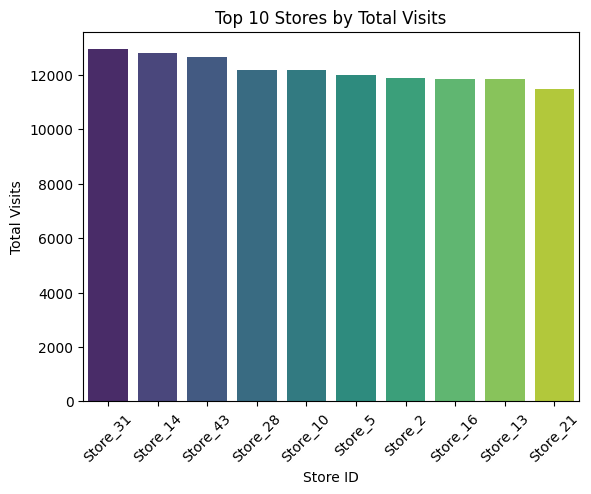

In [36]:
top10_store_total_visits = store_df.sort_values(by='Total Visits', ascending=False).head(10)
plt.figure()
sns.barplot(data=top10_store_total_visits, x='Store ID', y='Total Visits', palette='viridis')
plt.title('Top 10 Stores by Total Visits')
plt.xticks(rotation=45)
plt.show()

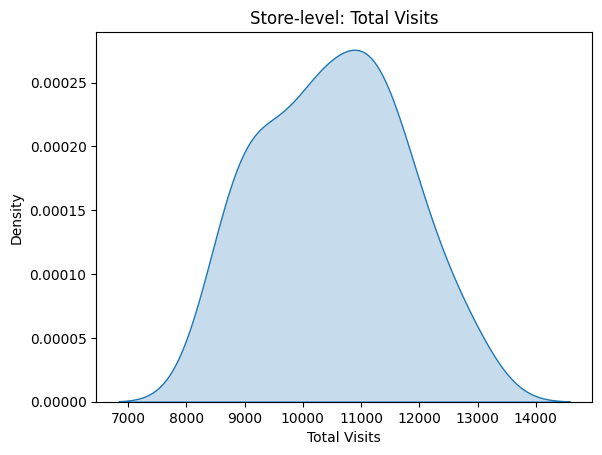

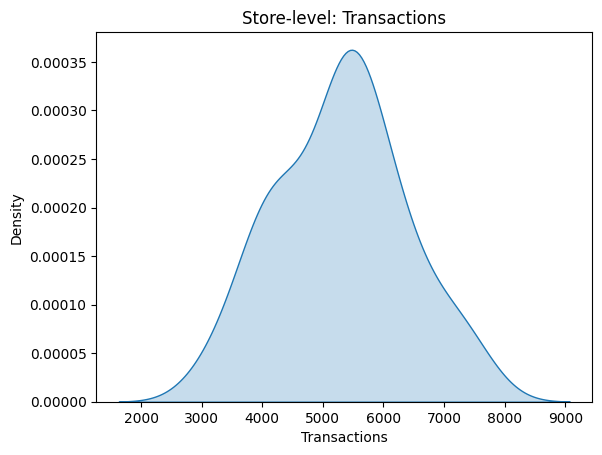

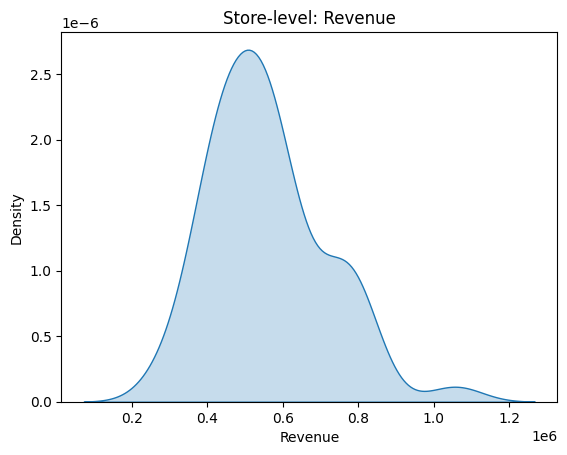

In [31]:
for metric in ['Total Visits', 'Transactions', 'Revenue']:
    plt.figure()
    sns.kdeplot(store_df[metric], fill=True)
    plt.title(f'Store-level: {metric}')
    plt.xlabel(metric)
    plt.ylabel('Density')
    plt.show()

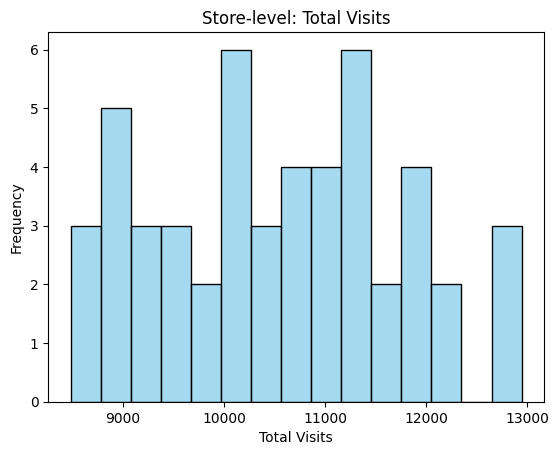

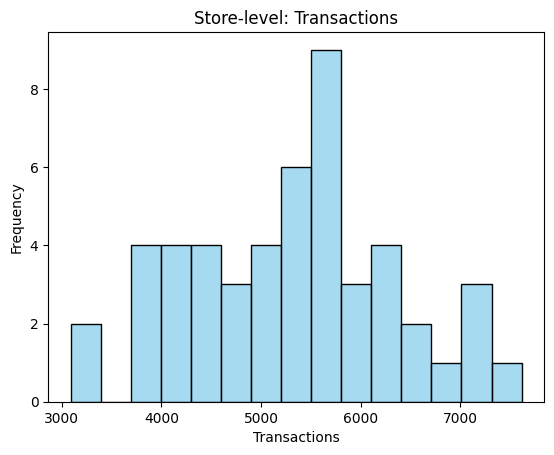

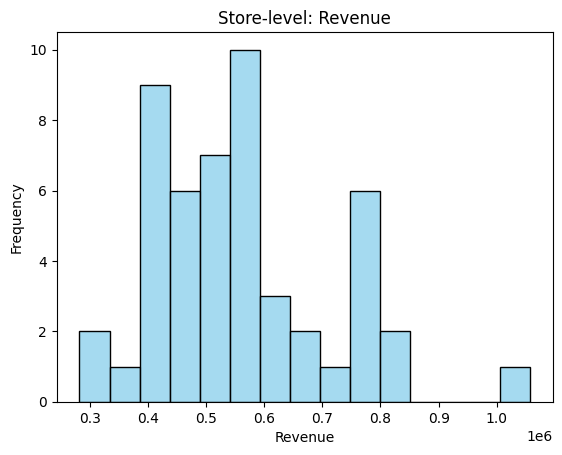

In [30]:
for metric in ['Total Visits', 'Transactions', 'Revenue']:
    plt.figure()
    sns.histplot(store_df[metric], bins=15, color='skyblue')
    plt.title(f'Store-level: {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.show()

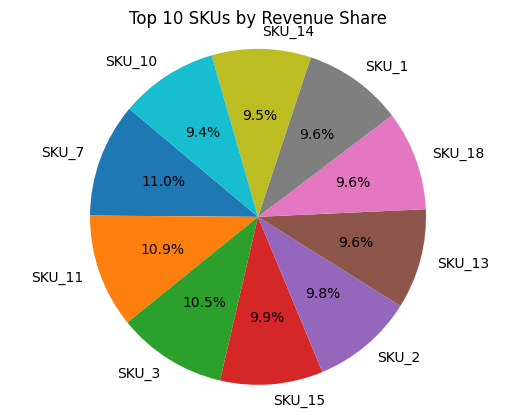

In [37]:
top10_sku_revenue = sku_df.sort_values(by='Revenue', ascending=False).head(10)
plt.figure()
plt.pie(top10_sku_revenue['Revenue'], labels=top10_sku_revenue['SKU ID'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 SKUs by Revenue Share')
plt.axis('equal')
plt.show()

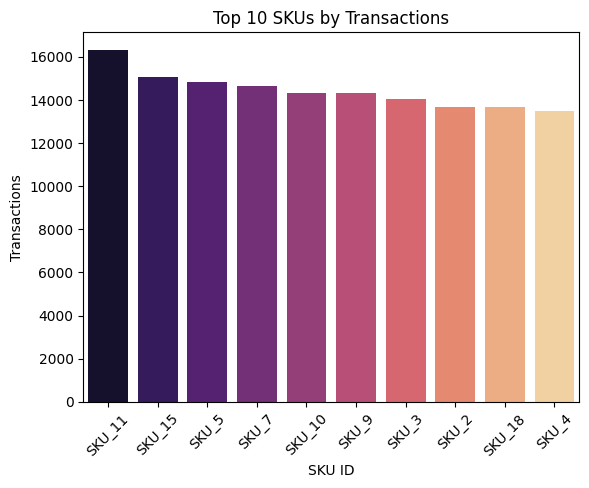

In [38]:
top10_sku_transactions = sku_df.sort_values(by='Transactions', ascending=False).head(10)
plt.figure()
sns.barplot(data=top10_sku_transactions, x='SKU ID', y='Transactions', palette='magma')
plt.title('Top 10 SKUs by Transactions')
plt.xticks(rotation=45)
plt.show()

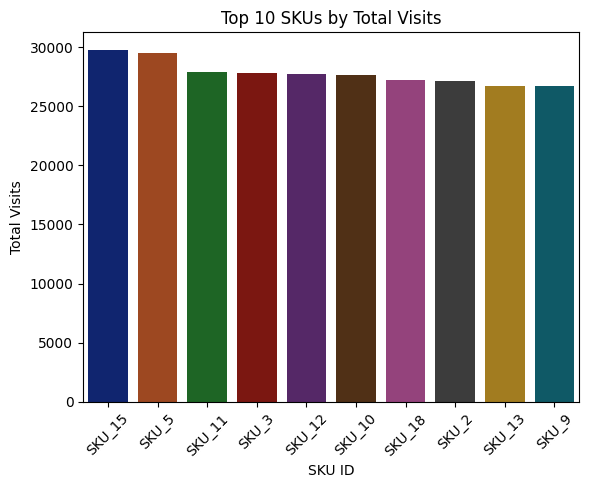

In [39]:
top10_sku_total_visits = sku_df.sort_values(by='Total Visits', ascending=False).head(10)
plt.figure()
sns.barplot(data=top10_sku_total_visits, x='SKU ID', y='Total Visits', palette='dark')
plt.title('Top 10 SKUs by Total Visits')
plt.xticks(rotation=45)
plt.show()

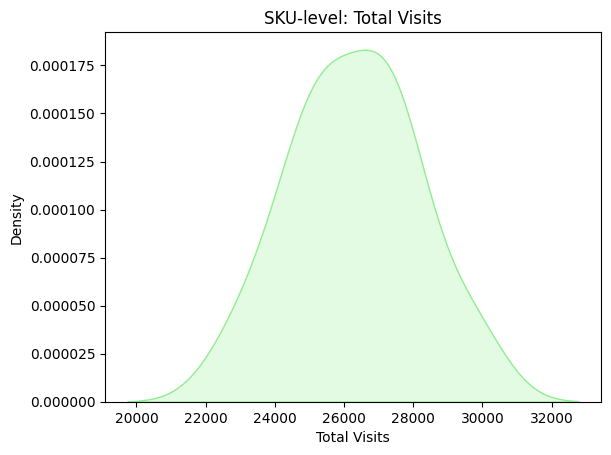

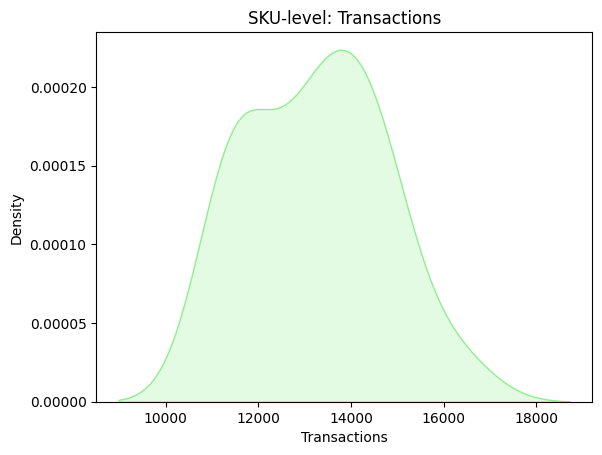

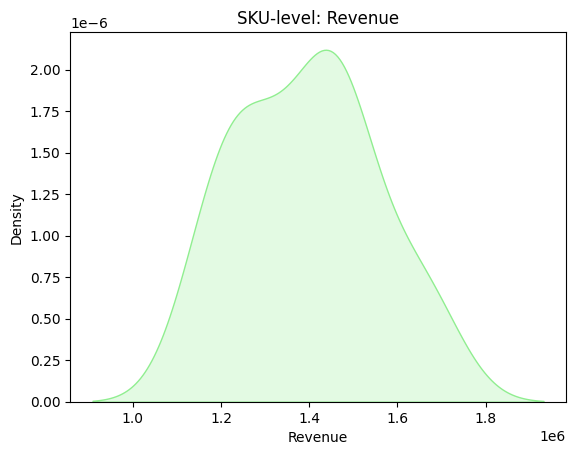

In [42]:
for metric in ['Total Visits', 'Transactions', 'Revenue']:
    plt.figure()
    sns.kdeplot(sku_df[metric], fill=True, color='lightgreen')
    plt.title(f'SKU-level: {metric}')
    plt.xlabel(metric)
    plt.ylabel('Density')
    plt.show()

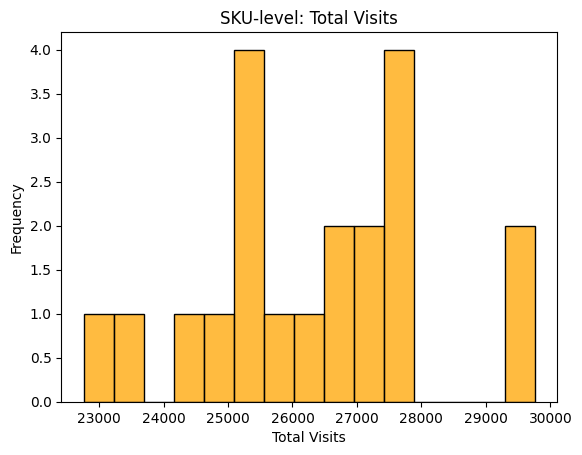

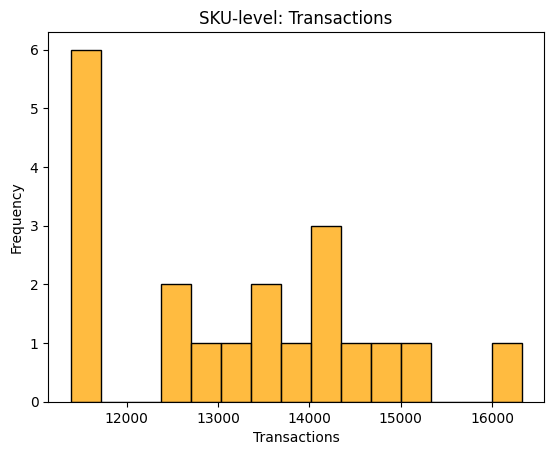

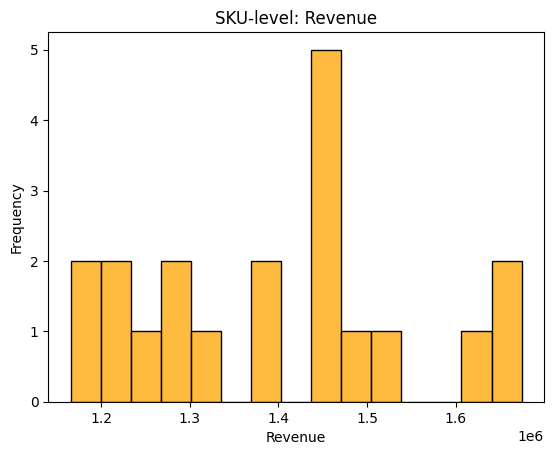

In [43]:
for metric in ['Total Visits', 'Transactions', 'Revenue']:
    plt.figure()
    sns.histplot(sku_df[metric], bins=15, color='orange')
    plt.title(f'SKU-level: {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.show()

In [59]:
print("\nTop 5 Stores by Conversion Rate:")
display(store_df.head(5))


Top 5 Stores by Conversion Rate:


,Store ID,Total Visits,Transactions,Revenue,Conversion Rate
32,Store_39,9213,6124,667804.09,66.471291
43,Store_49,11032,7129,793523.76,64.621102
38,Store_44,8482,5356,467371.06,63.145485
30,Store_37,9458,5937,404139.26,62.772256
41,Store_47,9753,6081,521435.76,62.350046


In [45]:
print("\nBottom 5 Stores by Conversion Rate:")
display(store_df.tail(5))


Bottom 5 Stores by Conversion Rate:


,Store ID,Total Visits,Transactions,Revenue,Conversion Rate
3,Store_12,8698,3310,313714.85,0.380547
23,Store_30,10659,4043,388411.83,0.379304
29,Store_36,10149,3819,431669.84,0.376293
5,Store_14,12804,4674,421539.55,0.365042
6,Store_15,8922,3090,362021.48,0.346335


In [46]:
print("\nTop 5 SKUs by Conversion Rate:")
display(sku_df.head(5))


Top 5 SKUs by Conversion Rate:


,SKU ID,Total Visits,Transactions,Revenue,Conversion Rate
2,SKU_11,27856,16323,1665863.73,0.585978
17,SKU_7,26103,14654,1674024.12,0.561391
7,SKU_16,23574,12906,1234789.51,0.547468
14,SKU_4,24782,13505,1370489.58,0.544952
19,SKU_9,26715,14324,1284551.61,0.536178


In [47]:
print("\nBottom 5 SKUs by Conversion Rate:")
display(sku_df.tail(5))


Bottom 5 SKUs by Conversion Rate:


,SKU ID,Total Visits,Transactions,Revenue,Conversion Rate
8,SKU_17,25295,11511,1313362.41,0.455070
18,SKU_8,25163,11447,1205717.50,0.454914
12,SKU_20,25224,11387,1165791.42,0.451435
10,SKU_19,25834,11440,1170544.47,0.442827
3,SKU_12,27687,11569,1222730.98,0.417850


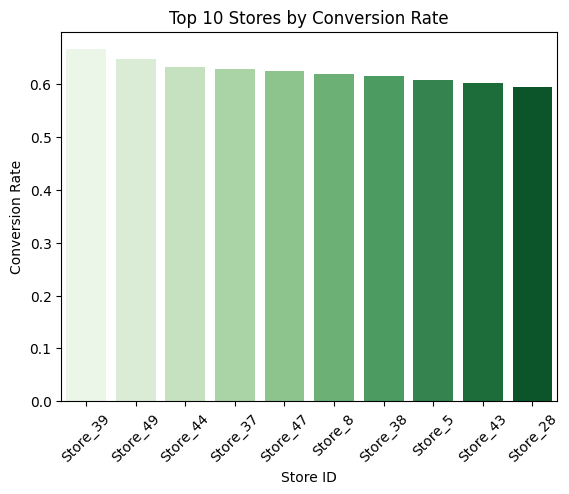

In [48]:
top10_stores = store_df.sort_values(by='Conversion Rate', ascending=False).head(10)
plt.figure()
sns.barplot(data=top10_stores, x='Store ID', y='Conversion Rate', palette='Greens')
plt.title('Top 10 Stores by Conversion Rate')
plt.xticks(rotation=45)
plt.ylabel('Conversion Rate')
plt.show()

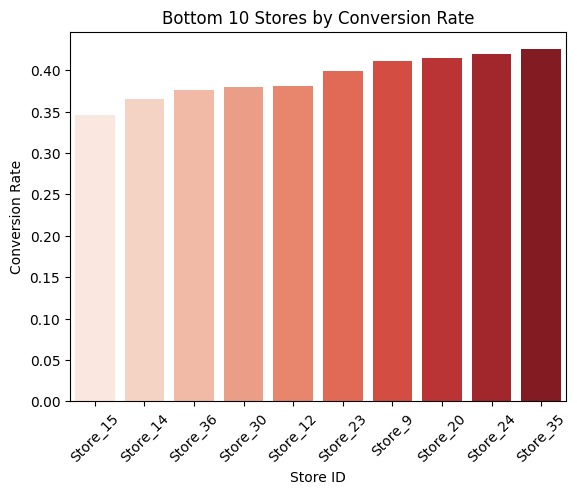

In [49]:
bottom10_stores = store_df.sort_values(by='Conversion Rate', ascending=True).head(10)
plt.figure()
sns.barplot(data=bottom10_stores, x='Store ID', y='Conversion Rate', palette='Reds')
plt.title('Bottom 10 Stores by Conversion Rate')
plt.xticks(rotation=45)
plt.ylabel('Conversion Rate')
plt.show()

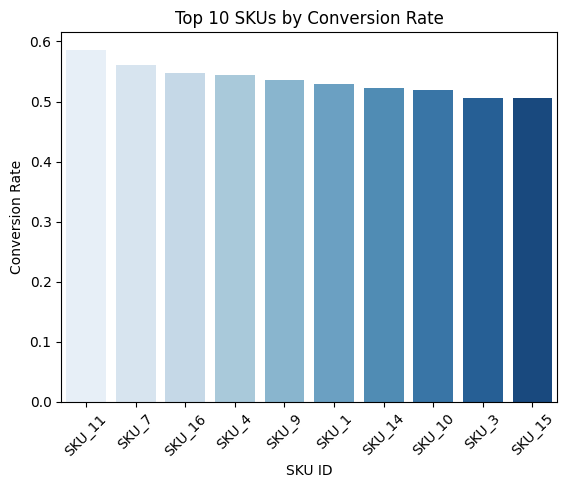

In [50]:
top10_skus = sku_df.sort_values(by='Conversion Rate', ascending=False).head(10)
plt.figure()
sns.barplot(data=top10_skus, x='SKU ID', y='Conversion Rate', palette='Blues')
plt.title('Top 10 SKUs by Conversion Rate')
plt.xticks(rotation=45)
plt.ylabel('Conversion Rate')
plt.show()

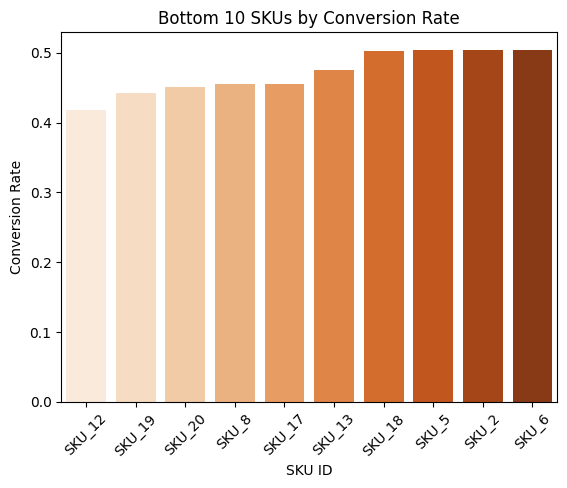

In [51]:
bottom10_skus = sku_df.sort_values(by='Conversion Rate', ascending=True).head(10)
plt.figure()
sns.barplot(data=bottom10_skus, x='SKU ID', y='Conversion Rate', palette='Oranges')
plt.title('Bottom 10 SKUs by Conversion Rate')
plt.xticks(rotation=45)
plt.ylabel('Conversion Rate')
plt.show()

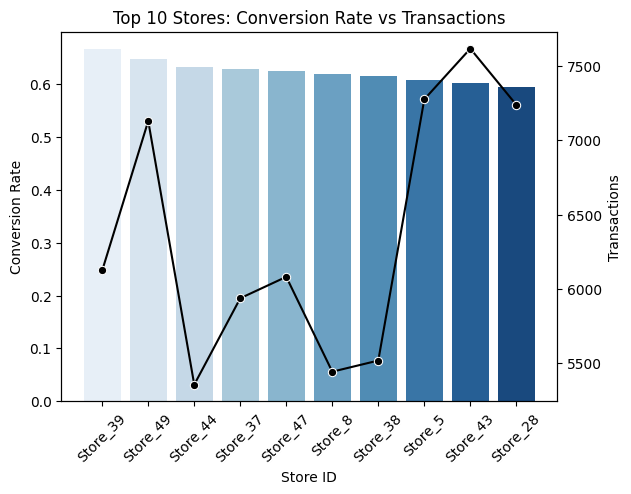

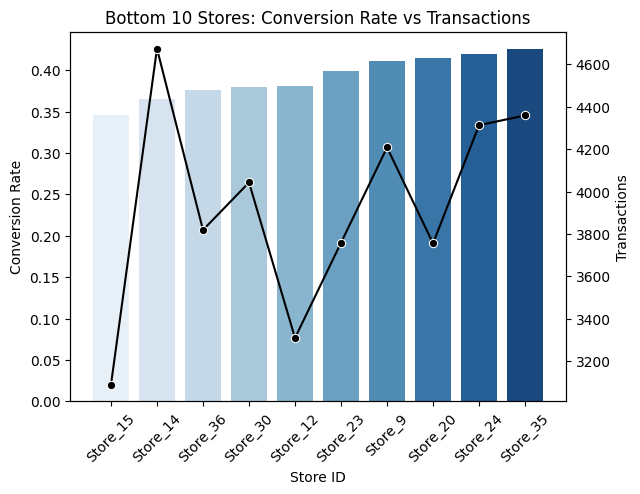

In [53]:
def plot_dual_axis(df, id_col, title):
    fig, ax1 = plt.subplots()
    sns.barplot(data=df, x=id_col, y='Conversion Rate', palette='Blues', ax=ax1)
    ax1.set_ylabel('Conversion Rate')
    ax1.set_title(title)
    ax1.set_xticklabels(df[id_col], rotation=45)
    ax2 = ax1.twinx()
    sns.lineplot(data=df, x=id_col, y='Transactions', color='black', marker='o', ax=ax2)
    ax2.set_ylabel('Transactions')
    plt.show()
plot_dual_axis(top10_stores, 'Store ID', 'Top 10 Stores: Conversion Rate vs Transactions')
plot_dual_axis(bottom10_stores, 'Store ID', 'Bottom 10 Stores: Conversion Rate vs Transactions')

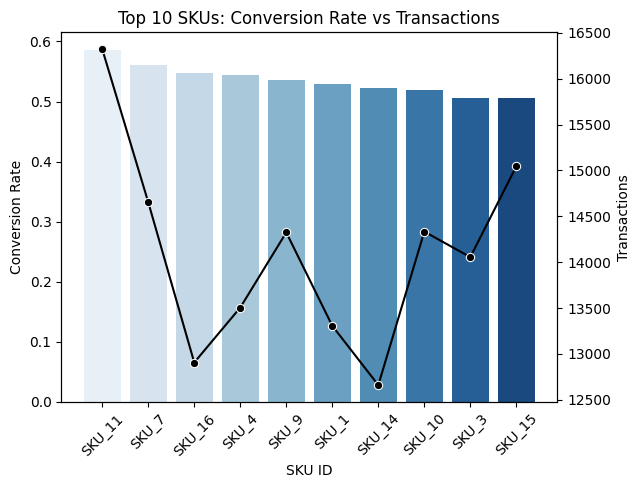

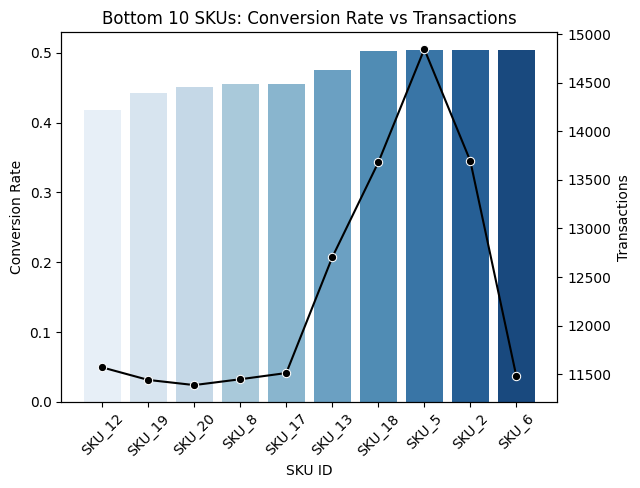

In [54]:
plot_dual_axis(top10_skus, 'SKU ID', 'Top 10 SKUs: Conversion Rate vs Transactions')
plot_dual_axis(bottom10_skus, 'SKU ID', 'Bottom 10 SKUs: Conversion Rate vs Transactions')

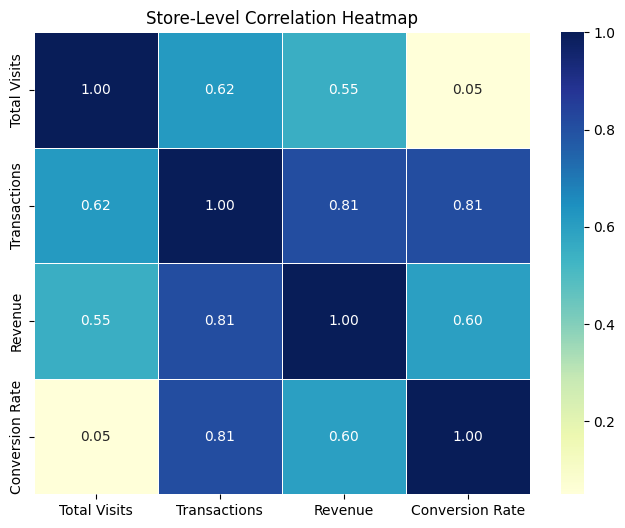

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(store_df[['Total Visits', 'Transactions', 'Revenue', 'Conversion Rate']].corr(), 
            annot=True, cmap='YlGnBu', linewidths=0.5, fmt=".2f")
plt.title("Store-Level Correlation Heatmap")
plt.show()

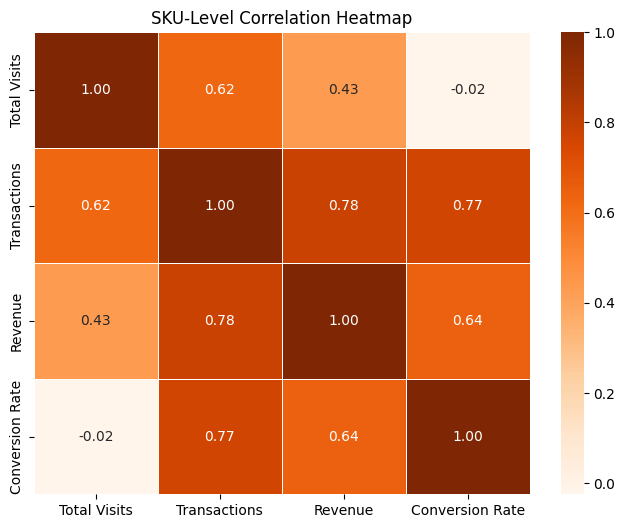

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(sku_df[['Total Visits', 'Transactions', 'Revenue', 'Conversion Rate']].corr(), 
            annot=True, cmap='Oranges', linewidths=0.5, fmt=".2f")
plt.title("SKU-Level Correlation Heatmap")
plt.show()